<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/DL/CNN/lec03_mnist_fc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6> lec03. MNIST
<pre>
* MNIST: Classify photos of handwritten digits (10 classes).
* Fashion-MNIST: Classify photos of items of clothing (10 classes).
* CIFAR-10: Classify small photos of objects (10 classes).
* CIFAR-100: Classify small photos of common objects (100 classes).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf


import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# from sklearn.datasets import load_boston
from keras.datasets     import mnist


# seed 고정

In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)

# Data Load

In [ ]:
#ML : X_train, X_test, y_test, y_test = train_test_split()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # [(arr),(arr)]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train[0], X_train[:1]

(array([5], dtype=uint8),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 136, 175,  26,

# EDA

In [ ]:
X_train.shape[0]

60000

In [ ]:
X_train[:30].shape

(30, 28, 28)

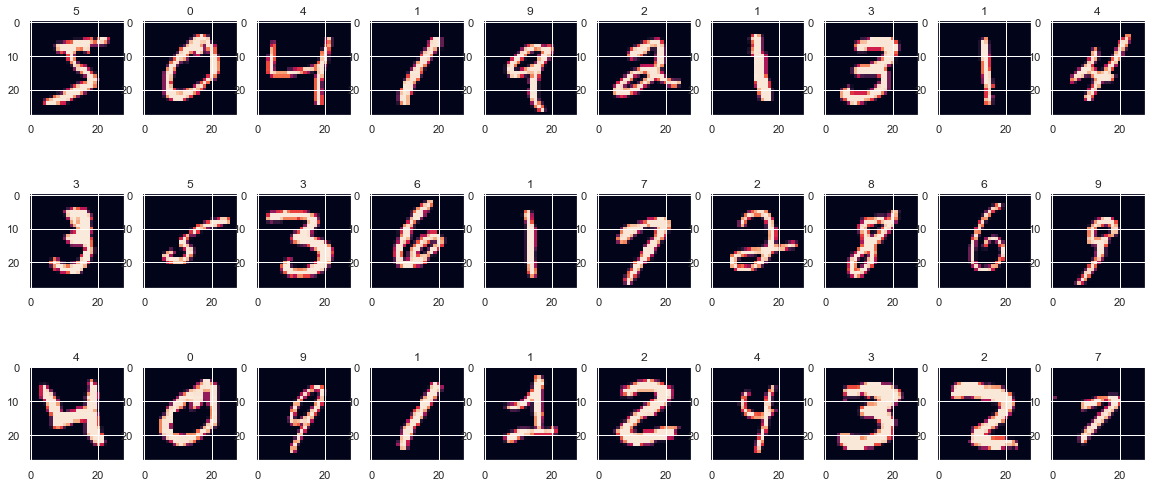

In [ ]:
import matplotlib.pyplot as plt
p, axes = plt.subplots(3, 10, figsize=(20,9))

for i, x in enumerate( range(X_train[:30].shape[0])):  #range(30)):
    r = i // 10
    c = i % 10
    axes[r][c].imshow(X_train[x])   #, cmap=pyplot.get_cmap('gray'))
    axes[r][c].set_title(y_train[x])
# plt.show()

In [ ]:
s = pd.Series(y_train)
s.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
s = pd.Series(y_train)
s[s.values==1].index  #1    6742

Int64Index([    3,     6,     8,    14,    23,    24,    40,    59,    67,
               70,
            ...
            59902, 59912, 59919, 59932, 59954, 59958, 59965, 59979, 59984,
            59994],
           dtype='int64', length=6742)

In [ ]:
idx_list = []
for num in range(10):      #num : 0 ~ 9
    idx_list.extend(s[s.values==num].index[:10])
print(idx_list[:], len(idx_list))


[1, 21, 34, 37, 51, 56, 63, 68, 69, 75, 3, 6, 8, 14, 23, 24, 40, 59, 67, 70, 5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 7, 10, 12, 27, 30, 44, 49, 50, 74, 86, 2, 9, 20, 26, 53, 58, 60, 61, 64, 89, 0, 11, 35, 47, 65, 100, 132, 138, 145, 173, 13, 18, 32, 36, 39, 62, 66, 73, 83, 90, 15, 29, 38, 42, 52, 71, 79, 84, 91, 96, 17, 31, 41, 46, 55, 85, 94, 97, 125, 137, 4, 19, 22, 33, 43, 45, 48, 54, 57, 80] 100


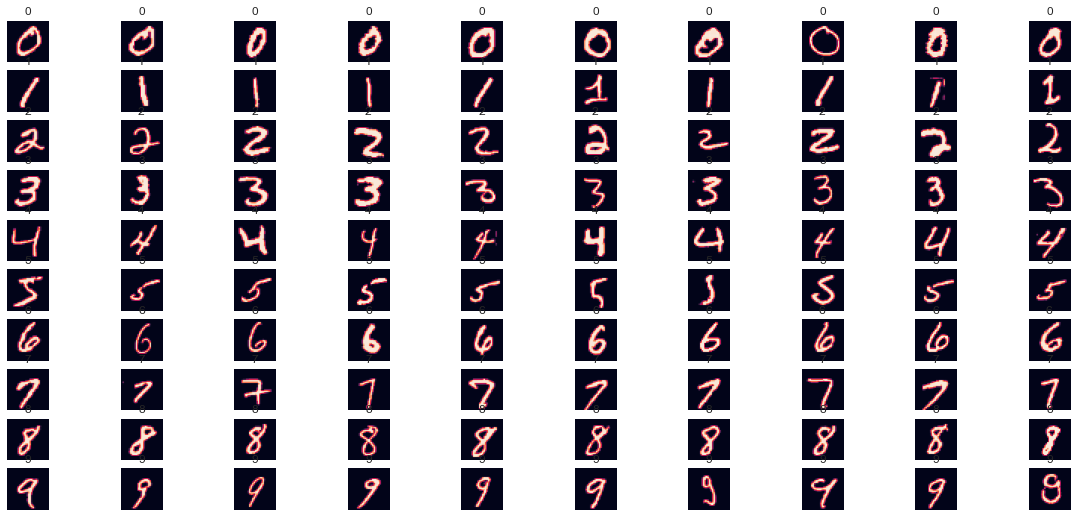

In [ ]:
p, axes = plt.subplots(10, 10, figsize=(20,9))

for i, idx in enumerate(idx_list):
    r = i // 10
    c = i % 10
    axes[r][c].imshow(X_train[idx])   #, cmap=pyplot.get_cmap('gray'))
    axes[r][c].set_title(y_train[idx])
    axes[r][c].axis('off')            #축 없에기
plt.show()
    

# X 데이터 가공
* flatten()화 : 2D arr --> 1D arr
* 0 ~ 255 : 스케일링(MinMaxScaler)

## flatten()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
28*28

784

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)   #60000 28,28   -->  60000 784
X_test  = X_test.reshape(X_test.shape[0], 784)     #10000 28,28   -->  10000 784

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train[0]    # 784 픽셀값을 갖는 이미지 1장

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## 픽셀값 정규화

In [ ]:
# print(X_train[:1])
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test  / 255.0
# print(X_train_scaler[:1])

# y label 평준화
*  (integers in range 0-9)
* ML : arr.LabelEncoder() 글->숫 , arr.OneHotEncoder() 1 0 0 0 ... df.get_dummies() 결측처리, 글->숫, 원핫인코딩


In [ ]:
from tensorflow.keras.utils import to_categorical

print(y_train[:5])
y_train_oh = to_categorical( y=y_train, num_classes=10, dtype='int32')
y_test_oh  = to_categorical( y=y_test, num_classes=10, dtype='int32')
print(y_test_oh[:5])

[5 0 4 1 9]
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


# 모델 설계

* Activation Function : sigmoid( 0~ 1) tanh(-1 ~ 1) softmax(0 ~...n) relu(0,val)   

In [ ]:
model = Sequential()
# model.add(Dense(units=64, activation='relu', input_dim=784))
model.add(Dense(units=64, activation='relu',  input_shape=(28*28,    )  ))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  #다중분류 예측(0~9)

In [ ]:
# model = Sequential([
#     Dense(units=64, activation='relu',  input_shape=(28*28, )  ),
#     Dense(units=32, activation='relu'),
#     Dense(units=16, activation='relu'),
#     Dense(units=10, activation='softmax')  #다중분류 예측(0~9)
# ])

In [ ]:
# input_layer   = Dense(units=64, activation='relu',  input_shape=(28*28, )  ),
# hidden_layer1 = Dense(units=32, activation='relu'),
# hidden_layer2 = Dense(units=16, activation='relu'),
# output_layer  = Dense(units=10, activation='softmax')  #다중분류 예측(0~9)
# 
# model = Sequential([
#    input_layer, hidden_layer1, hidden_layer2, output_layer
# ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


* model.compile : lom
* model.compile(loss ='',  optimizer='', metrics=[''])

* <font color=red><b> optimizer : back-propagation의 편미분한 값을 이용해 - 가중치 최적화
<pre>
gd(경사하강)
sgd(확률적 샘플링 경사하강)
momentum(가속도v*learn_rate), 
adagrade(피쳐별로 w다르게 조정), 
adam(momentum + adagrade)
rmsprop(..) 


* <font color=red><b> loss : 오류 (예측값-실제값) ----  1/n sum(잔차^2) -- 잔차제곱합의평균 ---- mse
              ( 모집단 - 샘플집단  = 모수(평균,분산) )
<pre>
회귀 : mse
분류 : 이진분류 손실함수(sigmoid)  ----- 손실값(cross entropy) class=2
         다중분류 손실함수(softmax)  ----- 손실값(cross entropy) class>2

<pre>
binary_crossentropy(원본값 둘중하나) : 0,1
sparse_crossentropy(원본값 n중 하나) : 0 ~ 9         
categorical_crossentropy(원핫인코딩) : 100000000 ~ 000000001    

In [ ]:
model.compile(loss ='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])  

# 학습 & 평가

* <font color=red><b> X는 스케일된 데이터, y는 원핫인코딩 데이터

In [ ]:
res = model.fit(X_train_scaler, y_train_oh, 
                epochs=30, 
                batch_size=128,        #128바이트씩 읽어라
                validation_split=0.1)  #학습:54만 ,  내부검증:6만

Epoch 1/30
422/422 [==============================] - 3s 5ms/step - loss: 0.4893 - accuracy: 0.8594 - val_loss: 0.1729 - val_accuracy: 0.9510
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1830 - accuracy: 0.9463 - val_loss: 0.1352 - val_accuracy: 0.9630
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1368 - accuracy: 0.9601 - val_loss: 0.1106 - val_accuracy: 0.9672
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1103 - accuracy: 0.9669 - val_loss: 0.0987 - val_accuracy: 0.9713
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0929 - accuracy: 0.9715 - val_loss: 0.0930 - val_accuracy: 0.9732
Epoch 6/30
422/422 [==============================] - 1s 4ms/step - loss: 0.0795 - accuracy: 0.9761 - val_loss: 0.0921 - val_accuracy: 0.9735
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0697 - accuracy: 0.9786 - val_loss: 0.0954 - val_accuracy: 0.9718
Epoch 

In [ ]:
loss_categorical_crossentropy , metrics_accuracy = model.evaluate(X_test_scaler, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 0.1390 - accuracy: 0.9732


# 학습 평가 시각화

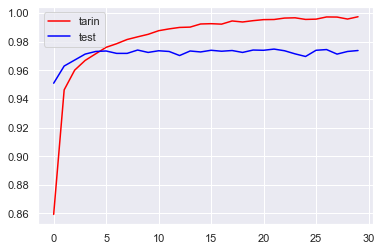

In [ ]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='tarin')
plt.plot(np.arange(len(res.history['accuracy'])), res.history['val_accuracy'], c='blue', label='test')
plt.legend()
plt.show()

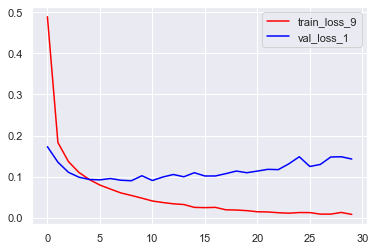

In [ ]:
plt.plot(np.arange(len(res.history['val_loss'])), res.history['loss'], c='red', label='train_loss_9')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss_1')
plt.legend()
plt.show()

# 오답 확인 (검증)

<font color=red><b>이미지 다룰 경우 픽셀 정규화 필수~!!!!!!!!
* 스케일링 전 : 335개 오답
* 스케일링 후 : 268개 오답

* 문법공부

In [ ]:
proba = model.predict(X_test_scaler)
print(proba[0])
#----------------------------------------------------------------------
# 방법1) arr 값들중 가장 큰 값의 인덱스 리턴
#----------------------------------------------------------------------
print(  np.argmax(proba[0]) )

#----------------------------------------------------------------------
# 방법2) by 상현 - arr 값들중 가장 큰 값을 찾아 값들을 비교 - 꺼낼때 번거롭다
#----------------------------------------------------------------------
max=proba[0].max()
print( np.where(proba[0] == max)[0][0] )

[3.6136723e-16 5.4211661e-12 1.4484175e-08 1.4880661e-07 9.1530560e-16
 7.0203249e-17 2.5141863e-19 9.9999988e-01 1.2499954e-09 1.0582584e-09]
7
7


In [ ]:
proba = model.predict(X_test_scaler)
print(len(proba), proba[:2])

list = []
for arr in proba:
    list.append(np.argmax(arr))

ox_df = pd.DataFrame({"y_test":y_test , "pred":list})
ox_df.head()

10000 [[3.6136723e-16 5.4211661e-12 1.4484175e-08 1.4880661e-07 9.1530560e-16
  7.0203249e-17 2.5141863e-19 9.9999988e-01 1.2499954e-09 1.0582584e-09]
 [5.2135533e-20 2.2998280e-11 1.0000000e+00 8.8031811e-16 3.0246043e-24
  1.5742618e-27 6.2168252e-22 2.2386838e-17 1.5683253e-15 1.0515435e-29]]


,y_test,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
ox_idx_list = ox_df[ ox_df['y_test']!= ox_df['pred']].index
ox_idx_list

Int64Index([   8,  115,  247,  321,  340,  406,  445,  495,  497,  545,
            ...
            9768, 9770, 9777, 9779, 9792, 9858, 9941, 9944, 9975, 9982],
           dtype='int64', length=268)

## 335개 오답 중 100개만 보기

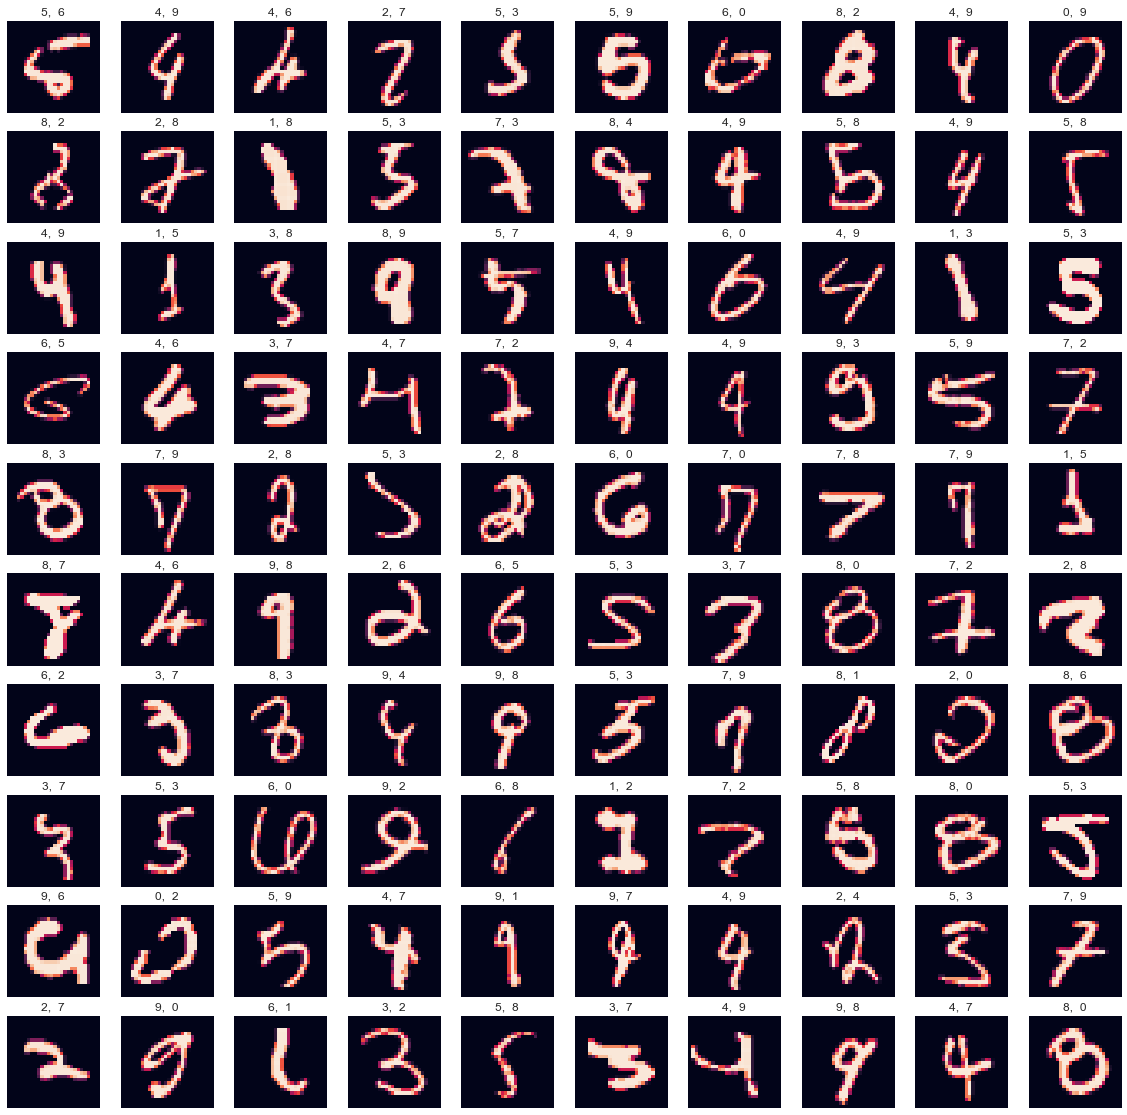

In [ ]:
p, axes = plt.subplots(10, 10, figsize=(20,20))

for i, idx in enumerate(ox_idx_list[:100]):
    r = i // 10
    c = i % 10
    axes[r][c].imshow(X_test_scaler[idx].reshape(28,28))   #, cmap=pyplot.get_cmap('gray'))
    axes[r][c].set_title(f"{y_test[idx]},  {ox_df.loc[idx]['pred']}")
    axes[r][c].axis('off')            #축 없에기
plt.show()